**Forecasting FB Prophet**
---

In [11]:
# Python
import pandas as pd
from prophet import Prophet


In [12]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [13]:
# Python
m = Prophet()
m.fit(df)

20:11:37 - cmdstanpy - INFO - Chain [1] start processing
20:11:37 - cmdstanpy - INFO - Chain [1] done processing


Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe.` By default it will also include the dates from the history, so we will see the model fit as well.

In [14]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The predict method will assign each row in future a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [15]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213906,7.514135,8.928187
3266,2017-01-16,8.538940,7.799407,9.212689
3267,2017-01-17,8.326370,7.612556,9.068564
3268,2017-01-18,8.159030,7.441534,8.856966
3269,2017-01-19,8.170992,7.432853,8.867917


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

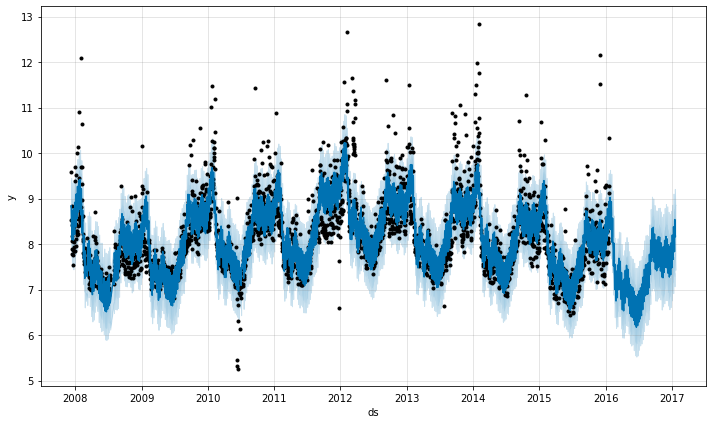

In [16]:
# Python
fig1 = m.plot(forecast)

If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

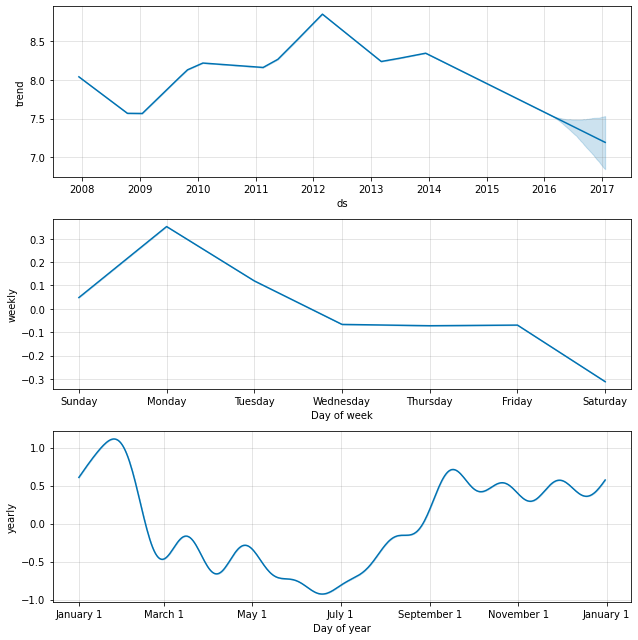

In [17]:
# Python
fig2 = m.plot_components(forecast)

An interactive figure of the forecast and components can be created with plotly. You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. You will also need to install the notebook and ipywidgets packages.

In [18]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [ ]:
# Python
plot_components_plotly(m, forecast)

NameError: name 'forecast' is not defined